In [1]:
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

from models.ddpg import DDPG
from models.model import OUNoise
from env.TradeEnv import TradeEnv

/home/chenpeng/.conda/envs/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = '../data/processed/'
df_macro = pd.read_csv(file_path + 'macro_data.csv')
df_stock = pd.read_csv(file_path + 'stock_data.csv')
df_factor = pd.read_csv(file_path + 'factor_data.csv')

env = TradeEnv(df_macro=df_macro, df_factor=df_factor, df_stock=df_stock)
agent = DDPG(env=env)
noise = OUNoise(action_dim=2)

Initialize trade environment...
Aligning df_macro, df_stock and df_factor...
df_macro shape:  (2674, 54)
df_stock shape:  (2674, 470)
df_factor shape:  (2674, 470)


In [3]:
batch_size = 128
rewards = []
avg_rewards = []

for episode in range(50):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    
    for i in range(1,5000):
        action = agent.get_action(state)
        action = noise.get_action(action, i)
        next_state, reward, terminated = env.step(action) 
        if not terminated:
            agent.memory.push(state, action, reward, next_state, terminated)
        
            state = next_state
            episode_reward += reward

        if len(agent.memory) > 1e3:
            agent.update(batch_size) 
            if i % 100 == 0:
                print('{}, {:>4d}: {:.7f}'.format(episode, i, episode_reward / i))

        if terminated:
            # sys.stdout.write("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break

    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

0, 1100: 0.0007115
0, 1200: 0.0006573
0, 1300: 0.0006548
1,  100: 0.0016997
1,  200: 0.0012450
1,  300: 0.0004353
1,  400: -0.0000332
1,  500: 0.0000569
1,  600: 0.0004591
1,  700: 0.0006015
1,  800: 0.0005397
1,  900: 0.0004528
1, 1000: 0.0006500
1, 1100: 0.0004634
1, 1200: 0.0003887
1, 1300: 0.0003390
2,  100: 0.0010314
2,  200: 0.0006342
2,  300: 0.0000671
2,  400: 0.0001370
2,  500: 0.0002981
2,  600: 0.0008415
2,  700: 0.0010261
2,  800: 0.0008832
2,  900: 0.0007249
2, 1000: 0.0009136
2, 1100: 0.0007221
2, 1200: 0.0006782
2, 1300: 0.0007142
3,  100: 0.0011713
3,  200: 0.0006818
3,  300: 0.0000107
3,  400: 0.0000753
3,  500: 0.0004694
3,  600: 0.0011789
3,  700: 0.0014776
3,  800: 0.0014222
3,  900: 0.0012908
3, 1000: 0.0013792
3, 1100: 0.0011502
3, 1200: 0.0011022
3, 1300: 0.0011700
4,  100: 0.0027267
4,  200: 0.0020481
4,  300: 0.0010295
4,  400: 0.0008121
4,  500: 0.0009391
4,  600: 0.0016418
4,  700: 0.0018037
4,  800: 0.0017012
4,  900: 0.0015655
4, 1000: 0.0017473
4, 1100: 0.

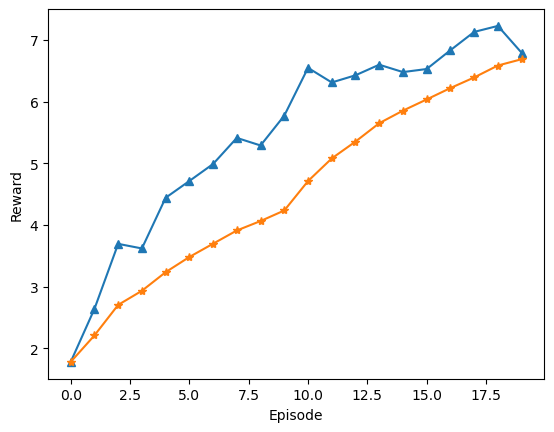

In [ ]:
plt.plot(rewards, '-^', label='Reward')
plt.plot(avg_rewards, '-*', label='Avg-Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()